In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
screen = 1.25
w = 0.05


def make_D(x, alpha, w):
    D = np.ones_like(x)
    D[np.abs(x - 1.25) <= w/2] = alpha   # reduce diffusion inside the screen region
    return D

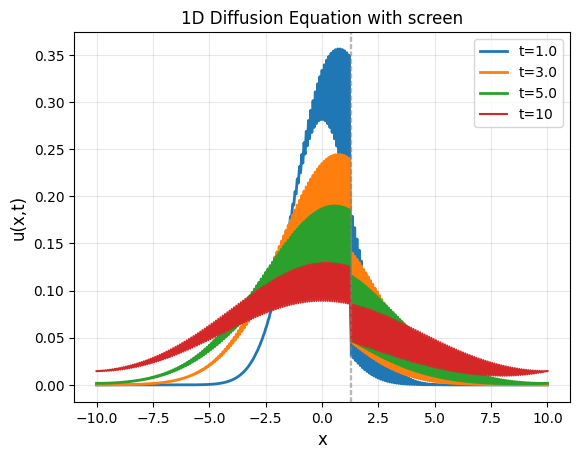

In [99]:
# --- Implementation of Eulers method with CFD --- 

Nx_spaces = 400     
L = 10
Nx_points = Nx_spaces + 1
x = np.linspace(-L, L, Nx_points)

N = 30000
T = 10
Nt_points = N + 1
t = np.linspace(0, T, Nt_points)

dx = x[1] - x[0]
dt = t[1] - t[0]
C = dt / (2 * dx)

# Diffusion coefficient
def make_D(x, alpha, w):
    D = np.ones_like(x)
    D[np.abs(x - 1.25) <= w/2] = alpha   # reduce diffusion inside the screen region
    return D


alpha = 0.01

D = make_D(x, alpha, w)


# Initial condition: Gaussian δ(x)
sigma = 2 * dx
u = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x)**2 / (2 * sigma**2))
u0 = u.copy()

# Times to save and plot
save_times = [1, 3, 5, 10]
save_indices = [int(t_val / dt) for t_val in save_times]
u_solutions = {}

# Analytic Gaussian solution at time t = Nt*dt
def analytic_solution(x, t_exact):
    u_exact = 1 / np.sqrt(2 * np.pi * (sigma0 ** 2 + 2 * t_exact)) * np.exp(-(x**2) / (2*(sigma0**2 + 2*t_exact)))
    return u_exact


# Forward Euler time stepping
F = np.zeros_like(D)
for n in range(N):
    u_new = u.copy()
    for j in range(1, Nx_points - 1):
        F[j] = D[j] * ((u[j+1] - u[j-1]) / (2 * dx) )
        u_new[j] = u[j] + C * (F[j+1] - F[j-1])
    # Neumann BCs
    u_new[0] = u_new[1]
    u_new[-1] = u_new[-2]
    u = u_new

    # Save solutions at specified times
    if n in save_indices:
        u_solutions[n * dt] = u.copy()

actual_times = sorted(u_solutions.keys())

for i, t_key in enumerate(actual_times):
    plt.plot(x, u_solutions[t_key], 
             label=f't={t_key:.1f}', linewidth=2)
plt.plot(x, u, label=f't={T}')
plt.axvline(x=screen - w/2, linestyle='--', color='gray', lw=1, alpha=0.5)
plt.axvline(x=screen + w/2, linestyle='--', color='gray', lw=1, alpha=0.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,t)', fontsize=12)
plt.title('1D Diffusion Equation with screen')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

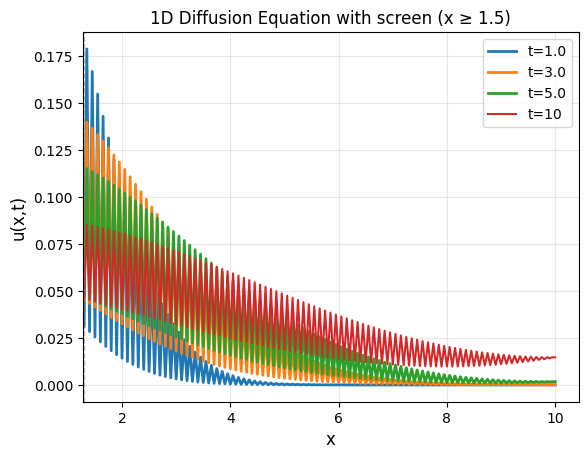

In [100]:
# Filter x values to only show x >= 1.5
cond = x >= screen + w/2
x_filtered = x[cond]

actual_times = sorted(u_solutions.keys())

for i, t_key in enumerate(actual_times):
    plt.plot(x_filtered, u_solutions[t_key][cond], 
             label=f't={t_key:.1f}', linewidth=2)
plt.plot(x_filtered, u[cond], label=f't={T}')
plt.axvline(x=screen - w, linestyle='--', color='gray', lw=1, alpha=0.5)
plt.axvline(x=screen + w, linestyle='--', color='gray', lw=1, alpha=0.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,t)', fontsize=12)
plt.title('1D Diffusion Equation with screen (x ≥ 1.5)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(left=screen + w/2)  # Explicitly set x-axis lower limit
plt.show()

In [101]:
# --- Compute Riemann sum at t = 3, alpha = 0.01 ---
t = 3.0
cond = x >= screen + w/2 
x_filtered = x[cond]

u_t3 = u_solutions[t][cond]
riemann_sum_t3 = np.sum(u_t3) * dx

print(f"Riemann sum at t={t}: {riemann_sum_t3}")

Riemann sum at t=3.0: 0.18719446775222173


In [102]:
# Define alpha values to test
# alphas = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
alphas = [4.5e-15, 4.5e-14]
riemann_sums_alpha = {}

for alpha in alphas:
    # Recreate diffusion coefficient
    D = make_D(x, alpha, w)
    
    # Reset initial condition
    u = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x)**2 / (2 * sigma**2))
    u_solutions_temp = {}
    
    # Forward Euler time stepping
    F = np.zeros_like(D)
    for n in range(N):
        u_new = u.copy()
        for j in range(1, Nx_points - 1):
            F[j] = D[j] * ((u[j+1] - u[j-1]) / (2 * dx))
            u_new[j] = u[j] + C * (F[j+1] - F[j-1])
        # Neumann BCs
        u_new[0] = u_new[1]
        u_new[-1] = u_new[-2]
        u = u_new
        
        # Save solution at t=3
        if n == int(3.0 / dt):
            u_solutions_temp[3.0] = u.copy()
    
    # Compute Riemann sum for x >= 1.5
    cond = x >= screen + w/2 
    u_t3 = u_solutions_temp[3][cond]
    riemann_sum = np.sum(u_t3) * dx
    riemann_sums_alpha[alpha] = riemann_sum
    print(f"Riemann sum at t=3 at alpha = {alpha}: {riemann_sum}")

Riemann sum at t=3 at alpha = 4.5e-15: 0.1491420464248533
Riemann sum at t=3 at alpha = 4.5e-14: 0.14914204642504703


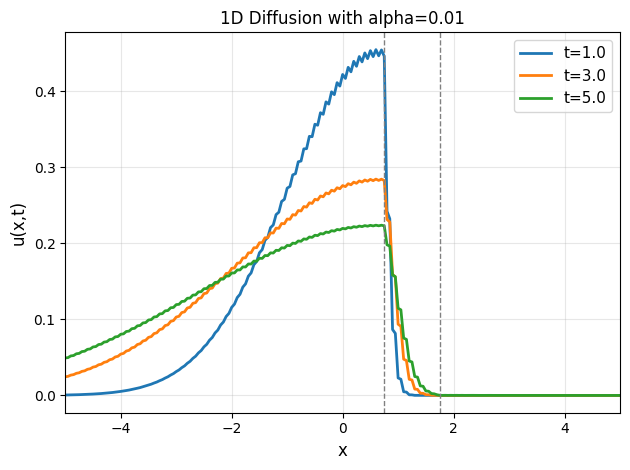

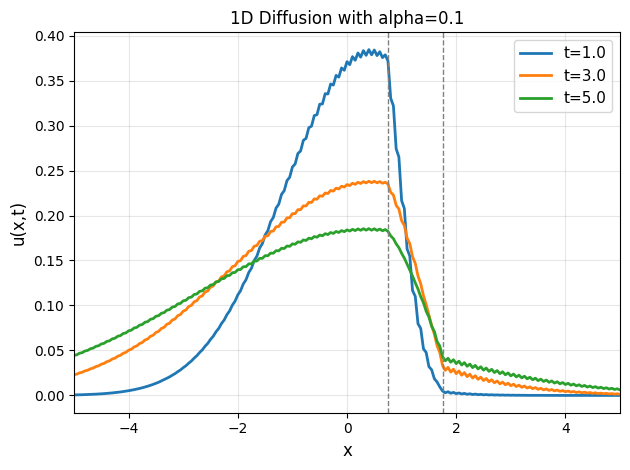

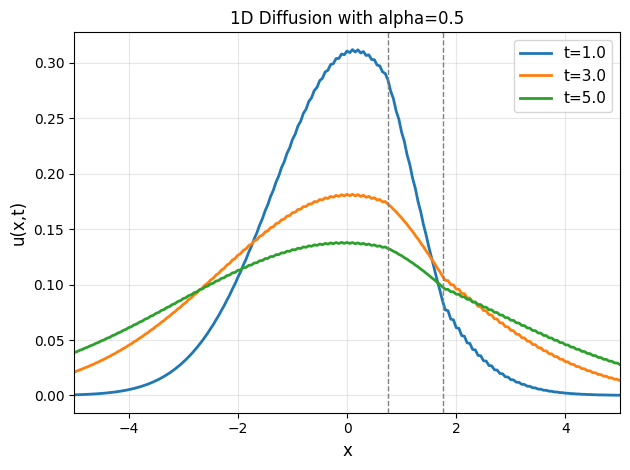

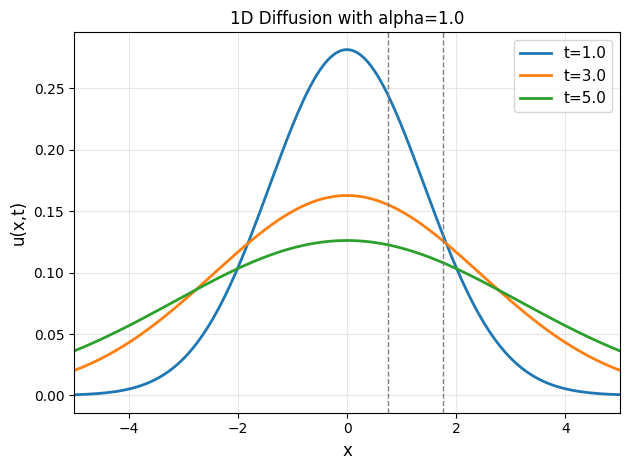

In [ ]:
# --- Implementation of Eulers method with CFD --- 

Nx_spaces = 400        # number of intervals
L = 5
Nx_points = Nx_spaces + 1
x = np.linspace(-L, L, Nx_points)

N = 30000
T = 10
Nt_points = N + 1
t = np.linspace(0, T, Nt_points)

dx = x[1] - x[0]
dt = t[1] - t[0]
C = dt / (2 * dx)

#  --- Plotting at different alpha values what happens at different times ---
alpha_values = [0.01, 0.1, 0.5, 1.0]

for alpha in alpha_values:
    # Reset initial condition
    u = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x)**2 / (2 * sigma**2))
    u /= np.sum(u) * dx
    u_solutions = {}
    
    # Set diffusion coefficient
    D = make_D(x, alpha, 1)
    
    # Forward Euler time stepping
    F = np.zeros_like(D)
    for n in range(N):
        u_new = u.copy()
        for j in range(1, Nx_points - 1):
            F[j] = D[j] * ((u[j+1] - u[j-1]) / (2 * dx))
            u_new[j] = u[j] + C * (F[j+1] - F[j-1])
        # Neumann BCs
        u_new[0] = u_new[1]
        u_new[-1] = u_new[-2]
        u = u_new
        
        # Save solutions at specified times
        if n in save_indices:
            u_solutions[n * dt] = u.copy()
            
    
    # Plot
    actual_times = sorted(u_solutions.keys())
    for i, t_key in enumerate(actual_times):
        plt.plot(x, u_solutions[t_key], label=f't={t_key:.1f}', linewidth=2)
    
    plt.axvline(x=0.75, linestyle='--', color='gray', lw=1)
    plt.axvline(x=1.75, linestyle='--', color='gray', lw=1)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('u(x,t)', fontsize=12)
    plt.title(f'1D Diffusion with alpha={alpha}')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xlim([-5, 5])
    plt.tight_layout()
    plt.show()